<a href="https://colab.research.google.com/github/asscodepams/sipomodule5a/blob/main/Module_TSP_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import random

In [11]:
!pip install openpyxl==3.0.7

In [13]:
from google.colab import files
uploaded = files.upload()

Saving DataTSP.xlsx to DataTSP (3).xlsx


In [14]:
import io
sheet=pd.read_excel(io.BytesIO(uploaded["DataTSP (3).xlsx"]))
sheet

,X,Y
0,147,65
1,47,157
2,122,77
3,46,176
4,176,58
5,196,164
6,140,91
7,218,54
8,159,81
9,47,95


In [15]:
cities=sheet.to_numpy()
cities

array([[147,  65],
       [ 47, 157],
       [122,  77],
       [ 46, 176],
       [176,  58],
       [196, 164],
       [140,  91],
       [218,  54],
       [159,  81],
       [ 47,  95]])

In [16]:
n=len(cities)
tour=random.sample(range(n),n)
tour

[5, 1, 2, 9, 7, 3, 8, 4, 6, 0]

In [17]:
import itertools
allpossibletour=list(itertools.permutations(tour))
len(allpossibletour)

3628800

In [18]:
def distance(A,B):
  jarak=np.linalg.norm(A-B)
  return jarak
def totaldistancetour(tour):
  d=0
  for i in range(1,len(tour)):
    d=d+distance(cities[tour[i-1]],cities[tour[i]])
  d=d+distance(cities[len(tour)-1],cities[0])
  return d

In [19]:
#Contoh menghitung total jarak pada tour ke-100
totaldistancetour(allpossibletour[100])

1014.9262355160961

In [21]:
lbest = 100000000
ibest = 0
for i in range(len(allpossibletour)):
  l = totaldistancetour(allpossibletour[i])
  if l < lbest:
      lbest = l
      ibest = i

In [22]:
#Total jarak rute terbaik(lbest)
print("Total Jarak", lbest)

Total Jarak 511.03488582705904


In [23]:
#Urutan rute terbaik
tour=allpossibletour[ibest]
print("Urutan Rute Terbaik", tour)

Urutan Rute Terbaik (5, 7, 4, 0, 8, 6, 2, 9, 1, 3)


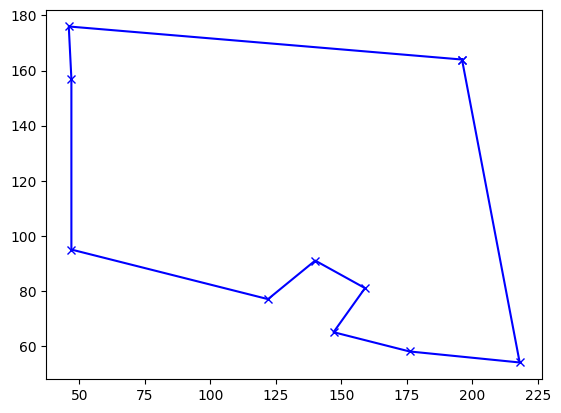

In [25]:
import matplotlib.pyplot as plt
plt.plot([cities[tour[i%n]][0]for i in range(n+1)], [cities[tour[i % n]][1] for i in range(n+1)], 'xb-');